<a href="https://colab.research.google.com/github/JBanerjee484/AutomobileDS/blob/main/AnomalyCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Call Directory
files = os.listdir('/content/drive/My Drive/')
print(files)

['Resume (1).gdoc', 'Resume.gdoc', 'VISA_Letter1.gdoc', 'VisaLetter2.gdoc', 'VisaLetterJanhavi.gdoc', 'ClusterNewsProject', 'Colab Notebooks', 'Untitled presentation.gslides']


In [4]:
import pandas as pd
file_path = '/content/drive/My Drive/ClusterNewsProject/cars_hyundai.csv'
dataset = pd.read_csv(file_path)
dataset.head()

,Engine Temperature (°C),Brake Pad Thickness (mm),Tire Pressure (PSI),Maintenance Type,Anomaly Indication
0,81.022390,7.984018,35.964546,Repair,0
1,98.076029,10.718692,32.143593,Routine Maintenance,1
2,81.205967,10.983070,31.058628,Routine Maintenance,1
3,86.081294,7.045311,28.539264,Repair,0
4,93.496568,9.948991,33.599560,Component Replacement,1


In [5]:
req_dataset=dataset[['Engine Temperature (°C)','Brake Pad Thickness (mm)','Tire Pressure (PSI)']]
y_target=dataset[['Anomaly Indication']]

In [6]:
req_dataset=req_dataset.astype(float)

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(req_dataset,y_target, test_size=0.2, random_state=42, stratify=None)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
y_test.columns

Index(['Anomaly Indication'], dtype='object')

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the Autoencoder model
input_dim = X_train_scaled.shape[1]  # Number of features (4 in this case)
encoding_dim = 2  # Size of the encoded representation (can be adjusted)

# Define the input layer
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Build the Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.1,
                          verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - loss: 0.5120 - val_loss: 0.5099
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5171 - val_loss: 0.4997
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4891 - val_loss: 0.4895
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4788 - val_loss: 0.4793
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4529 - val_loss: 0.4692
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4658 - val_loss: 0.4592
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4585 - val_loss: 0.4491
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4455 - val_loss: 0.4392
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4358 - val_loss: 0.4293
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4400 - val_loss: 0.4193
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4152 - val_loss: 0.4092
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4057 - val_loss: 0.3991


In [14]:
import numpy as np

# Predict on test data
X_test_reconstructed = autoencoder.predict(X_test_scaled)

# Calculate the reconstruction error
mse = np.mean(np.power(X_test_scaled - X_test_reconstructed, 2), axis=1)

# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)

# Detect anomalies
y_pred = (mse > threshold).astype(int)

# # Create a DataFrame to display results
# results_df = pd.DataFrame({
#     'True_Label': y_test.values,
#     'Reconstruction_Error': mse,
#     'Anomaly': y_pred
# })

# Display results
print(f"Threshold for anomaly detection: {threshold}")
print(f"Number of anomalies detected: {np.sum(y_pred)}")
# print(results_df.head())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Threshold for anomaly detection: 1.927255957334557
Number of anomalies detected: 11


Confusion Matrix:
[[112   4]
 [ 97   7]]
Classification Report:
              precision    recall  f1-score   support

      Normal       0.54      0.97      0.69       116
   Anomalous       0.64      0.07      0.12       104

    accuracy                           0.54       220
   macro avg       0.59      0.52      0.41       220
weighted avg       0.58      0.54      0.42       220

ROC AUC Score: 0.46734084880636606


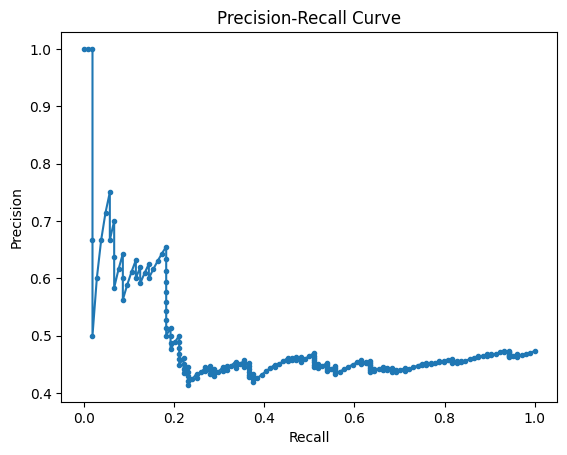

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_pred are the predicted anomalies (0 or 1)
# Assuming y_test are the true labels (0 or 1)

# Convert predictions for confusion matrix and other metrics
y_pred_binary = (y_pred > 0).astype(int)  # Ensure y_pred is in binary format

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomalous'])
print("Classification Report:")
print(class_report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, mse)
print(f"ROC AUC Score: {roc_auc}")

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()